In [1]:
from   faraway.datasets import manilius as m, families as f, pima as p
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf

## 1.2 Initial Analysis

In [2]:
print(p.DESCR)


Diabetes survey on Pima Indians

Description

The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study on 768 adult female Pima Indians living near Phoenix.

Usage

data(pima)
Format

The dataset contains the following variables

pregnant
Number of times pregnant

glucose
Plasma glucose concentration at 2 hours in an oral glucose tolerance test

diastolic
Diastolic blood pressure (mm Hg)

triceps
Triceps skin fold thickness (mm)

insulin
2-Hour serum insulin (mu U/ml)

bmi
Body mass index (weight in kg/(height in metres squared))

diabetes
Diabetes pedigree function

age
Age (years)

test
test whether the patient shows signs of diabetes (coded 0 if negative, 1 if positive)

Source

The data may be obtained from UCI Repository of machine learning databases at http://archive.ics.uci.edu/ml/



In [3]:
pima = p.load()
pima.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.describe().round(1)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


In [5]:
# Note mins of 0s which is problematic
pima.diastolic.sort_values().head()

347    0
494    0
222    0
81     0
78     0
Name: diastolic, dtype: int64

In [6]:
(pima.diastolic == 0).sum()

35

In [7]:
no_zero_fields = ['diastolic', 'triceps', 'insulin', 'glucose', 'bmi']
pima.replace(
    {field: 0 for field in no_zero_fields}, np.nan, inplace=True)

In [8]:
# 'test' is categorical/binary so summary makes little sense
pima.test.unique()

array([1, 0])

In [9]:
pima.test = pima.test.astype('category')
pima.test = pima.test.cat.rename_categories(['negative', 'positive'])
pima.test.value_counts()

negative    500
positive    268
Name: test, dtype: int64

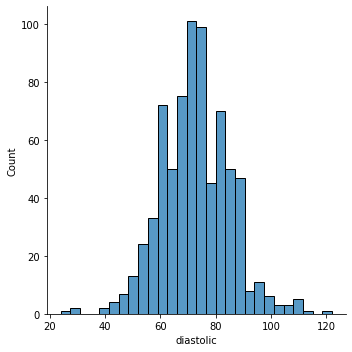

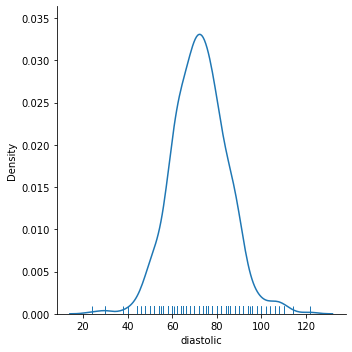

In [10]:
diastolic = pima.diastolic.dropna().sort_values()
sns.displot(diastolic)
sns.displot(diastolic, kind='kde', rug=True);

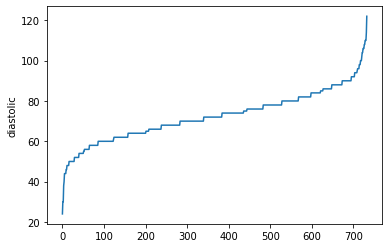

In [11]:
sns.lineplot(x=range(len(diastolic)), y=diastolic); 

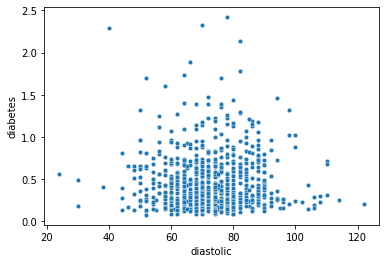

In [12]:
sns.scatterplot(x='diastolic', y='diabetes', data=pima, s=20);

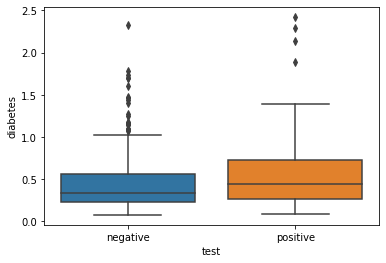

In [13]:
sns.boxplot(x='test', y='diabetes', data=pima);

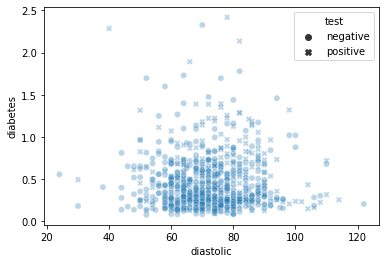

In [14]:
sns.scatterplot(
    x='diastolic', y='diabetes', data=pima, style='test', alpha=0.3);

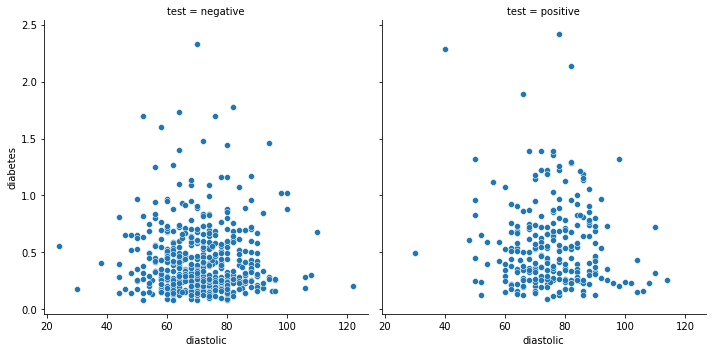

In [15]:
sns.relplot(x='diastolic', y='diabetes', data=pima, col='test');

## 1.4 History

In [16]:
manilius = m.load()
manilius.head()

,arc,sinang,cosang,group
0,13.166667,0.8836,-0.4682,1
1,13.133333,0.9996,-0.0282,1
2,13.200000,0.9899,0.1421,1
3,14.250000,0.2221,0.9750,3
4,14.700000,0.0006,1.0000,3


In [17]:
moon3 = manilius.groupby('group').sum()
moon3

,arc,sinang,cosang
group,,,
1,118.133333,8.4987,-0.7932
2,140.283333,-6.1404,1.7443
3,127.533333,2.9777,7.9649


In [18]:
moon3['intercept'] = 9
np.linalg.solve(moon3[['intercept', 'sinang', 'cosang']], moon3.arc)

array([14.54458591, -1.48982207,  0.13412639])

In [19]:
mod = smf.ols('arc ~ sinang + cosang', manilius).fit()
mod.params

Intercept    14.561624
sinang       -1.504581
cosang        0.091365
dtype: float64

In [20]:
families = f.load()
families.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5


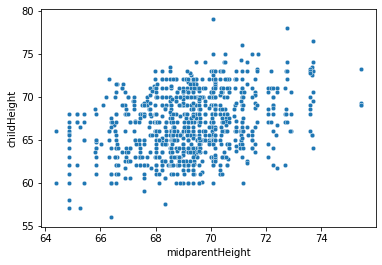

In [21]:
sns.scatterplot(
    x='midparentHeight', y='childHeight', data=families, s=20);

In [22]:
mod = smf.ols('childHeight ~ midparentHeight', families).fit()
mod.params

Intercept          22.636241
midparentHeight     0.637361
dtype: float64

In [24]:
cor = sp.stats.pearsonr(
    families.childHeight, families.midparentHeight
)[0]
sdy = families.childHeight.std()
sdx = families.midparentHeight.std()
beta = cor * sdy/sdx
alpha =  (families.childHeight.mean() 
          - beta*families.midparentHeight.mean())
[round(p, 2) for p in (alpha, beta)]

[22.64, 0.64]

In [25]:
beta1 = sdy/sdx
alpha1 = (families.childHeight.mean() 
          - beta1*families.midparentHeight.mean())

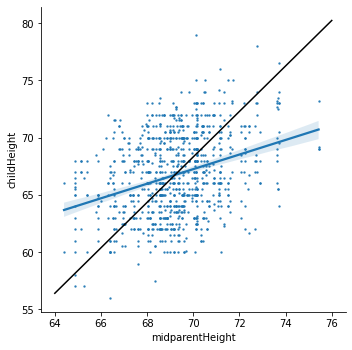

In [30]:
sns.lmplot(x='midparentHeight', 
           y='childHeight', 
           data=families, 
           ci=95, 
           scatter_kws={'s': 2})
xr = np.array([64, 76])
plt.plot(xr, alpha1 + xr*beta1, color='k');